#  K-Means Clustering

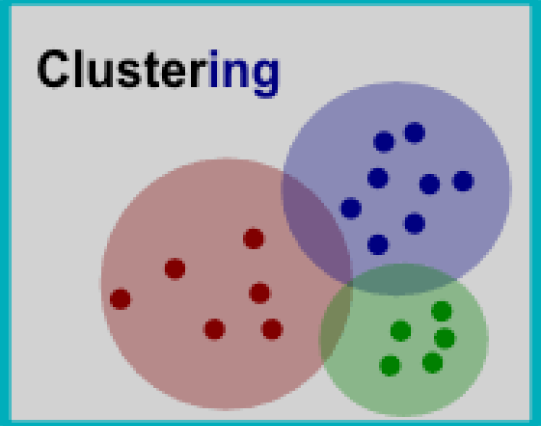

##  Introduction


In this project I will be building a K-means clustering model,K-means can be used for clustering

K-means is an unsupervised machine learning algorithm

Unsupervised learning is the process of building a model without a predefined label

The purpose of unsupervised learning is to extract structure and pattern from a dataset that does not have a label



## Objective

The dataset for this project is a university dataset,so the K-means model will help to classify different universities
into private and  public  university clusters

##  Project Strategy

I will implement below strategy using python programming and weka GUI

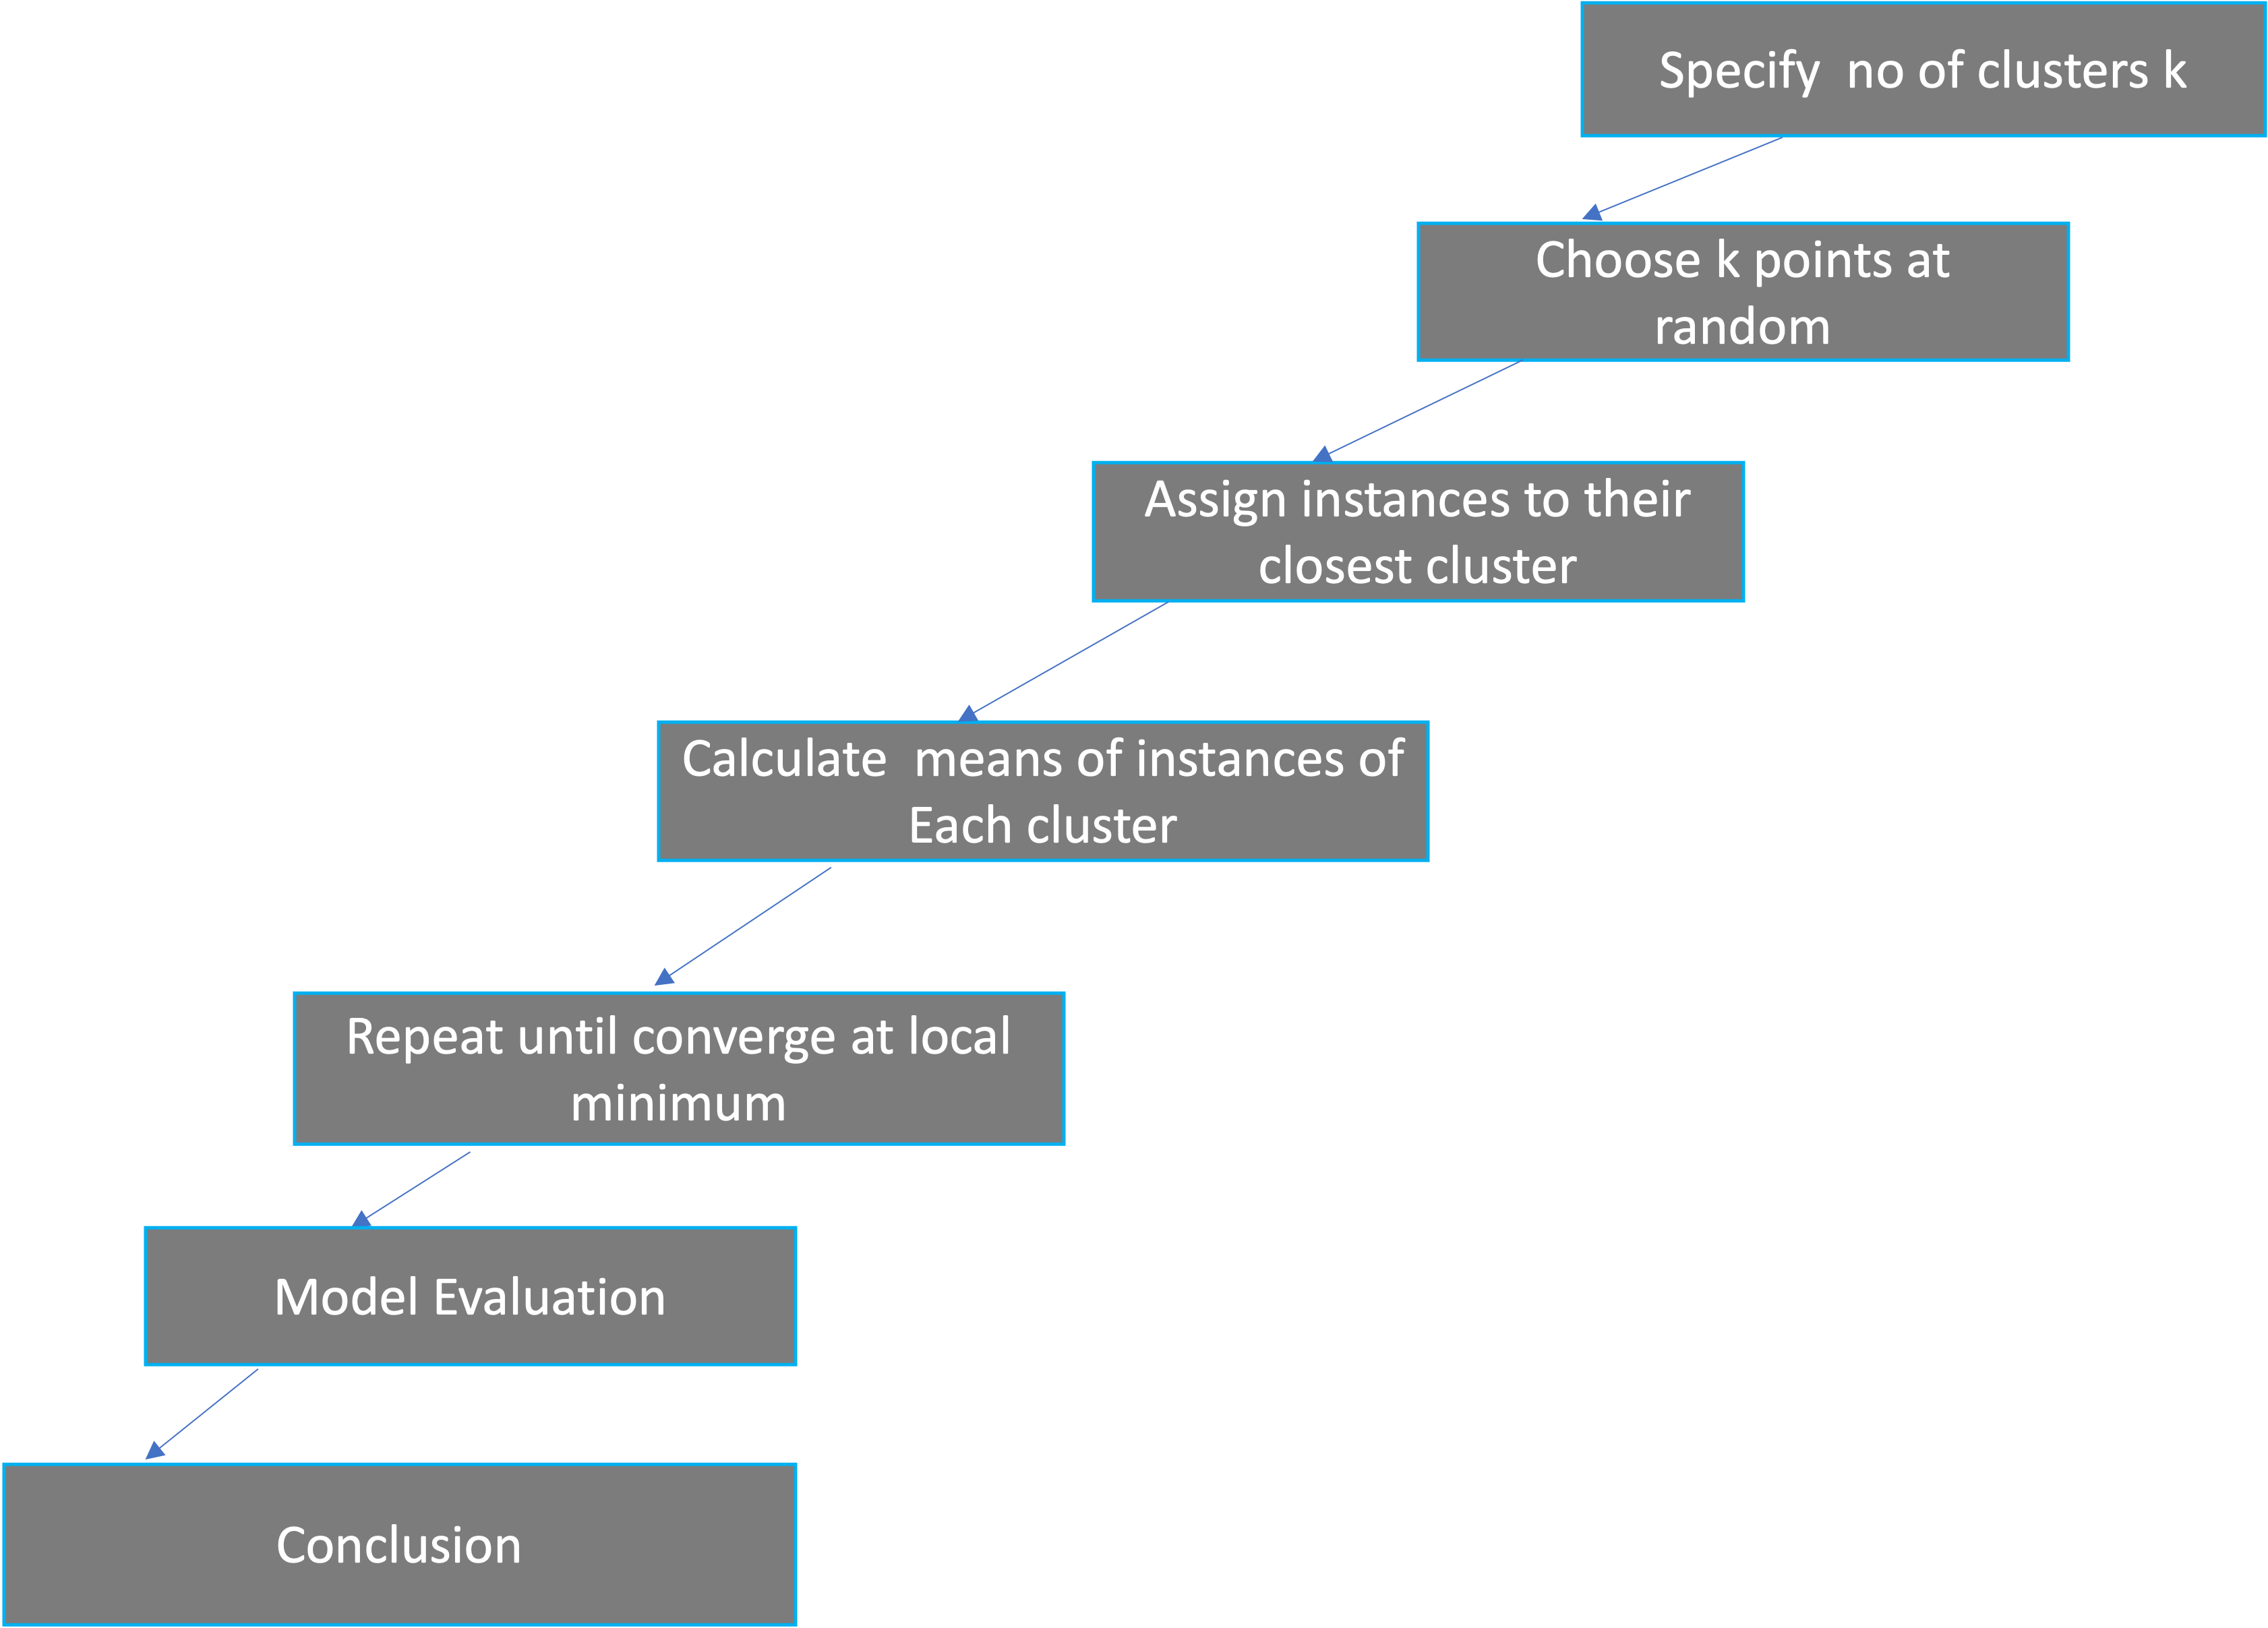

In [ ]:
## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [13]:
df = pd.read_csv('./College_Data',index_col=0)

**Check the head of the data**

In [4]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

** Check the info() and describe() methods on the data.**

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

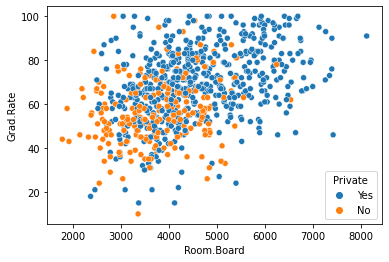

In [35]:
sns.scatterplot(x='Room.Board',y='Grad.Rate',data=df, hue='Private')
plt.show()

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

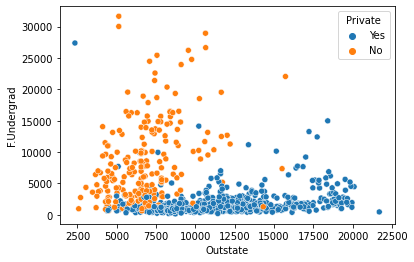

In [19]:
sns.scatterplot(x='Outstate',y='F.Undergrad',data=df, hue='Private')
plt.show()

In [9]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

** Create an instance of a K Means model with 2 clusters.**

In [24]:
# Here I select k Clusters and choose k points at random
km = KMeans(n_clusters = 2, random_state=90)

**Here I drop the "private" label or feature because in K-means it is assumed that no label is available.**

In [25]:
km.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2, random_state=90)

In [26]:
# Below are the means of cluster centroids
km.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

  ## Model Evaluation

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [27]:
def converter(prvt):
    if prvt == 'Yes':
        return 1
    else:
        return 0

In [28]:
df['Cluster'] = df['Private'].apply(converter)

In [29]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [33]:
print(confusion_matrix(df['Cluster'],km.labels_))


[[ 74 138]
 [ 34 531]]


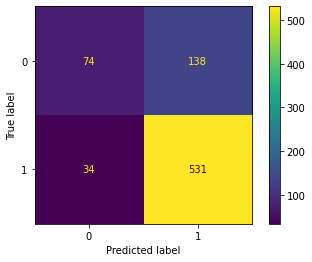

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix(df['Cluster'],km.labels_))
disp.plot()
plt.show()

## Conclusion

Below I will interprete above confusion matrix

531 instances are true positive, that is 531 instances were correctly classified as private university.
74 instances were correctly classfied as public university.
Accuracy is 78%
Recall is 94%, recall implies  that out of all private university how many are predicted as private universities
Precision is 79%,precision implies that when the model predicts private university how often is it correct
Error rate is 22%,error rate implies rate of misclassifications.


In [58]:
Accuracy=TP+TN/Total

Accuracy=((531+74)/777)*100
print('Accuracy is:',round(Accuracy),'percent')

Accuracy is: 78 percent


In [59]:
Recall=TP/TP+FN

Recall=531/(531+34)*100
print('Recall is:',round(Recall),'percent')

Recall is: 94 percent


In [61]:
Precision=TP/TP+FP
Precision=531/(531+138)*100
print('Precision is:',round(Precision),'percent')

Precision is: 79 percent


In [68]:
Error rate=FP+FN/Total

Error_rate=(138+34)/777*100
print('Error rate is:',round(Error_rate),'percent')

Error rate is: 22 percent
